In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [10]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Visualize the dataset

Target labels:  [9 4 4 3 8 7 4 2 0 1]


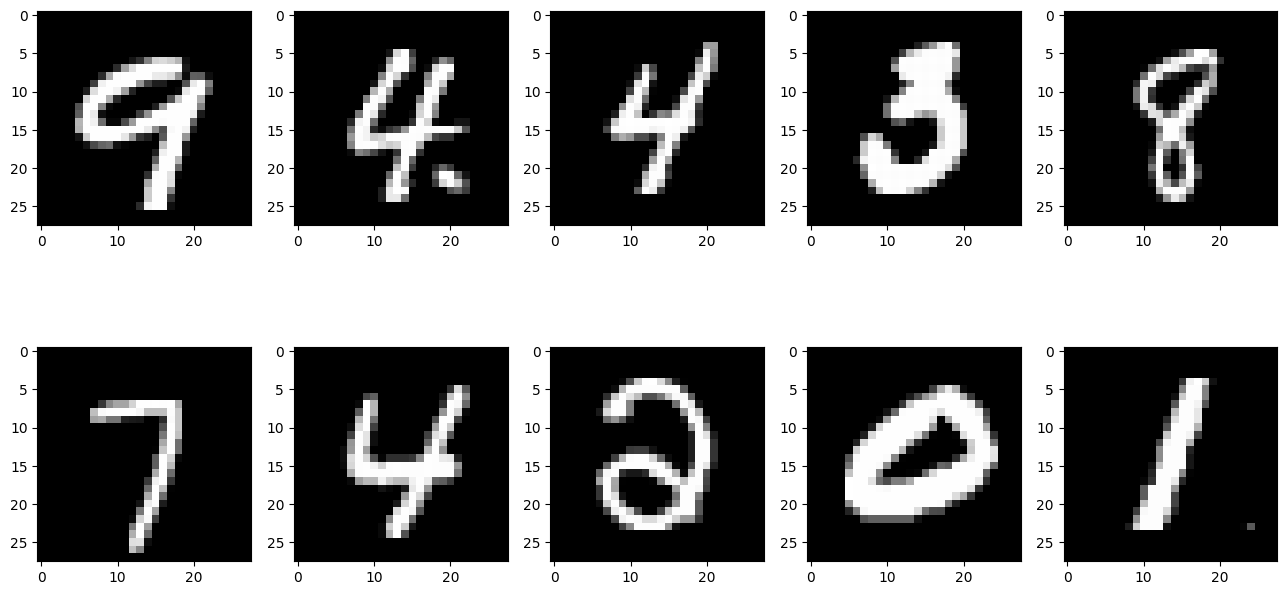

In [11]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [12]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [32]:
from tensorflow.keras.regularizers import l1, l2
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Add L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))   # Add L1 regularization
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Train the model

In [33]:
train_info = model.fit(new_train_data , new_train_target , epochs = 13, batch_size=64)

Epoch 1/13
938/938 [==============================] - 6s 6ms/step - loss: 0.7854 - accuracy: 0.9033
Epoch 2/13
938/938 [==============================] - 4s 5ms/step - loss: 0.4054 - accuracy: 0.9492
Epoch 3/13
938/938 [==============================] - 5s 5ms/step - loss: 0.3097 - accuracy: 0.9590
Epoch 4/13
938/938 [==============================] - 5s 6ms/step - loss: 0.2614 - accuracy: 0.9639
Epoch 5/13
938/938 [==============================] - 5s 6ms/step - loss: 0.2322 - accuracy: 0.9662
Epoch 6/13
938/938 [==============================] - 6s 6ms/step - loss: 0.2131 - accuracy: 0.9688
Epoch 7/13
938/938 [==============================] - 5s 5ms/step - loss: 0.1994 - accuracy: 0.9709
Epoch 8/13
938/938 [==============================] - 5s 5ms/step - loss: 0.1885 - accuracy: 0.9724
Epoch 9/13
938/938 [==============================] - 5s 5ms/step - loss: 0.1824 - accuracy: 0.9729
Epoch 10/13
938/938 [==============================] - 5s 5ms/step - loss: 0.1738 - accuracy: 0.9744

Plot the loss and accuracy graphs

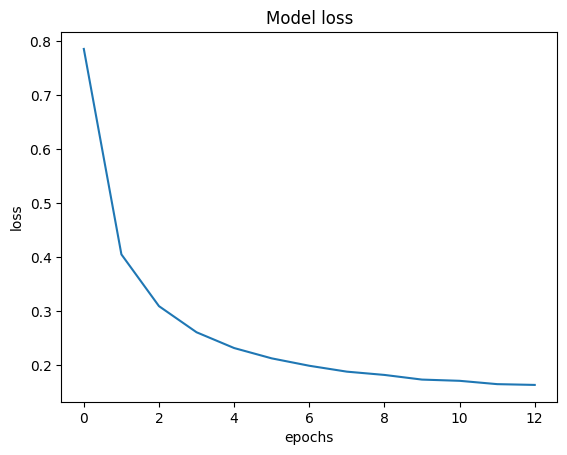

In [34]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

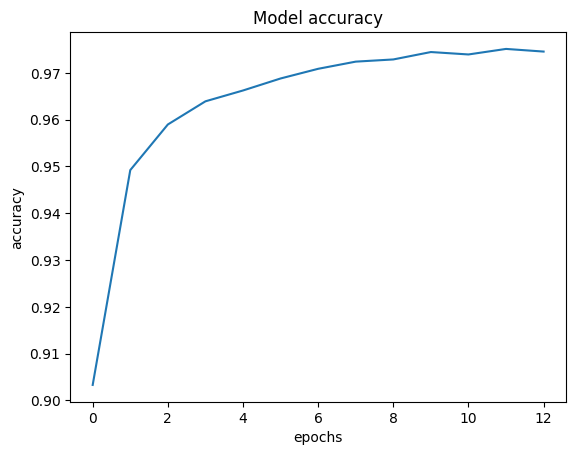

In [35]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [36]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9708
Loss of the Test dataset is: 0.17683272063732147
Accuracy of the test dataset is: 0.97079998254776


Save the model weights

In [37]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(new_test_target, axis=1)

313/313 [==============================] - 1s 2ms/step


In [39]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

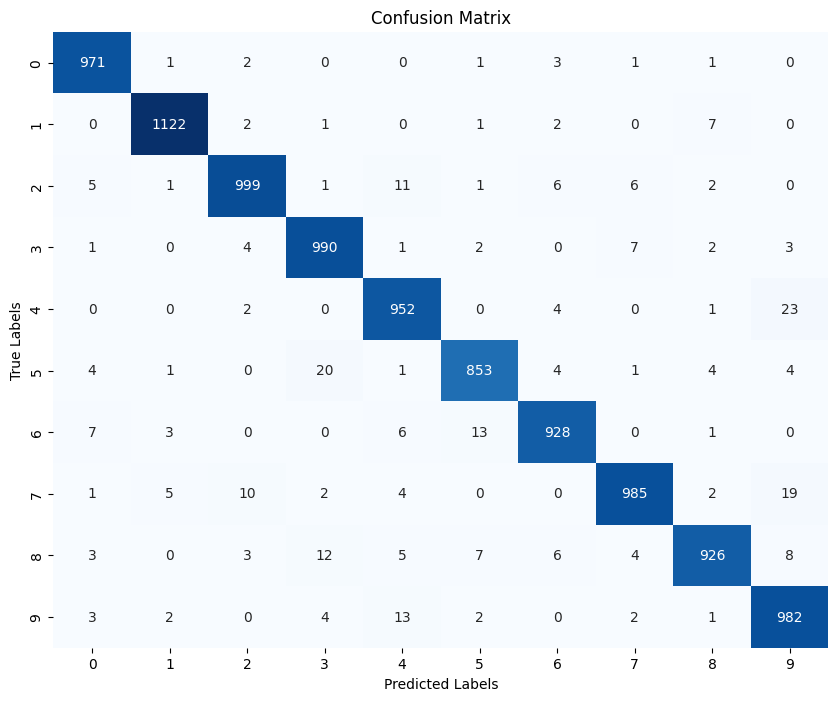

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()